--- 📊 INICIANDO ANÁLISE COMPARATIVA MULTIANUAL (SP) ---
   -> Encontrados 5 arquivos de histórico.
      Lendo: focos_br_todos-sats_2020.csv...
      Lendo: focos_br_todos-sats_2021.csv...
      Lendo: focos_br_todos-sats_2022.csv...
      Lendo: focos_br_todos-sats_2023.csv...
      Lendo: focos_br_todos-sats_2024.csv...
   -> Coluna de data detectada: 'data_pas'
✅ SUCESSO! Total de focos em SP (2020-2024): 506732


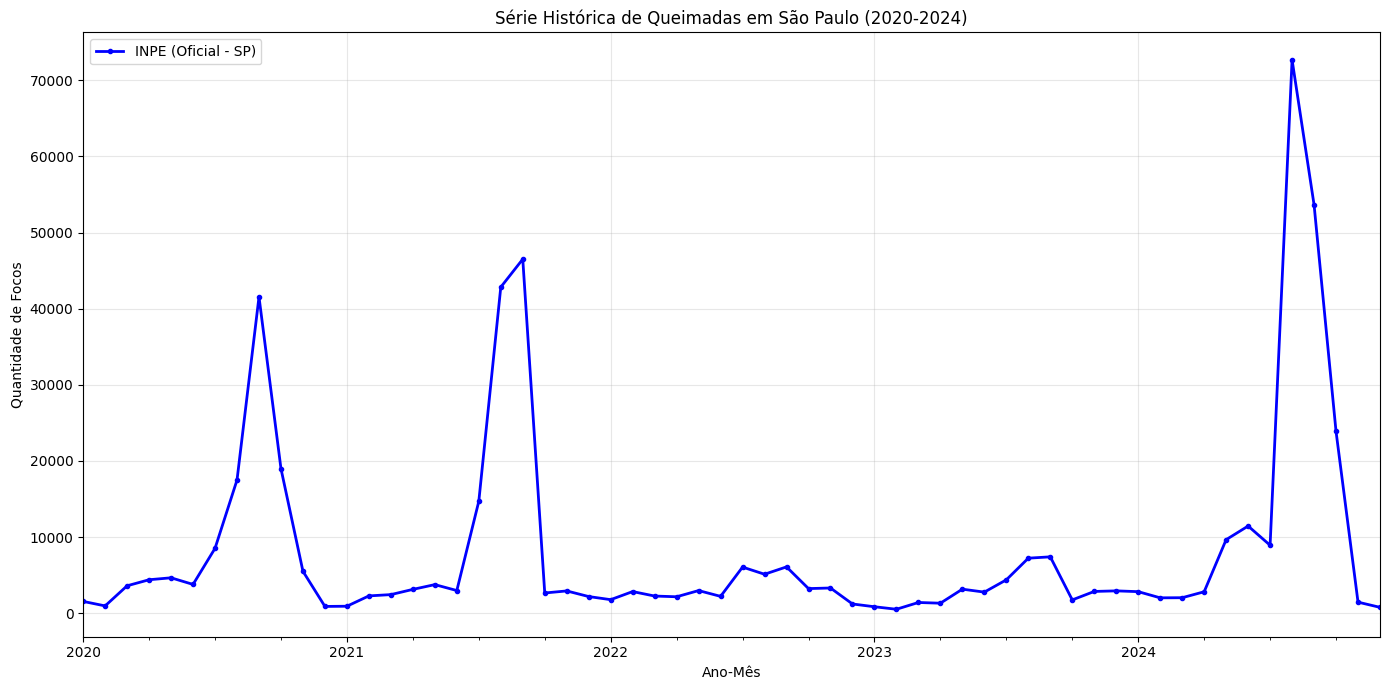

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

print("--- 📊 INICIANDO ANÁLISE COMPARATIVA MULTIANUAL (SP) ---")

# ==========================================
# 1. CARREGAR E UNIFICAR DADOS DO INPE
# ==========================================
padrao_arquivos = "data/focos_br_todos-sats_*.csv"
arquivos_encontrados = glob.glob(padrao_arquivos)

lista_sp = []
print(f"   -> Encontrados {len(arquivos_encontrados)} arquivos de histórico.")

coluna_estado_real = None

for arquivo in sorted(arquivos_encontrados):
    try:
        print(f"      Lendo: {os.path.basename(arquivo)}...")
        df_temp = pd.read_csv(arquivo)
        
        # Procura coluna de estado
        if coluna_estado_real is None:
            for col in df_temp.columns:
                if col.lower() in ['estado', 'uf', 'nm_estado']:
                    coluna_estado_real = col
                    break
        
        if coluna_estado_real:
            # Filtra SP
            df_sp_temp = df_temp[
                df_temp[coluna_estado_real].astype(str).str.upper().isin(['SAO PAULO', 'SÃO PAULO', 'SP'])
            ].copy()
            
            if not df_sp_temp.empty:
                lista_sp.append(df_sp_temp)
        
    except Exception as e:
        print(f"      [ERRO] Falha ao ler {arquivo}: {e}")

# Juntar tudo
if lista_sp:
    df_sp_final = pd.concat(lista_sp, ignore_index=True)
    
    # --- CORREÇÃO AQUI: ADICIONEI 'data_pas' NA LISTA ---
    coluna_data_real = None
    # Prioridade para 'data_pas' que vimos no seu erro
    possiveis_nomes = ['data_pas', 'datahora', 'DataHora', 'Data', 'data', 'acq_date']
    
    for nome in possiveis_nomes:
        if nome in df_sp_final.columns:
            coluna_data_real = nome
            break
            
    if coluna_data_real:
        print(f"   -> Coluna de data detectada: '{coluna_data_real}'")
        
        # Converte para data
        df_sp_final['data_formatada'] = pd.to_datetime(df_sp_final[coluna_data_real]).dt.date
        df_sp_final = df_sp_final.sort_values('data_formatada')
        
        print(f"✅ SUCESSO! Total de focos em SP (2020-2024): {len(df_sp_final)}")
        
        # --- PLOTAR O GRÁFICO ---
        plt.figure(figsize=(14, 7))
        
        # Agrupa por MÊS para visualizar melhor a tendência de 5 anos
        df_sp_final['mes_ano'] = pd.to_datetime(df_sp_final['data_formatada']).dt.to_period('M')
        focos_inpe_mes = df_sp_final.groupby('mes_ano').size()
        
        # Plota o gráfico
        focos_inpe_mes.plot(kind='line', label='INPE (Oficial - SP)', color='blue', linewidth=2, marker='.')
        
        plt.title("Série Histórica de Queimadas em São Paulo (2020-2024)")
        plt.ylabel("Quantidade de Focos")
        plt.xlabel("Ano-Mês")
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
    else:
        print("\n❌ ERRO CRÍTICO: Ainda não achei a data.")
        print(f"Colunas disponíveis: {list(df_sp_final.columns)}")

else:
    print("❌ ERRO: Nenhum dado de São Paulo encontrado nos arquivos.")

In [7]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


--- 📊 RELATÓRIO DE PERFORMANCE ADAPTADO (REGRESSÃO) ---
✅ Dados de Regressão carregados. Analisando ganho por município...


C:\Users\Lilian\AppData\Local\Temp\ipykernel_424\1486295864.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='ganho_perc', y='municipio', data=df_top10, palette='viridis')


💾 Gráfico salvo como 'figura_performance_regressao.png'.


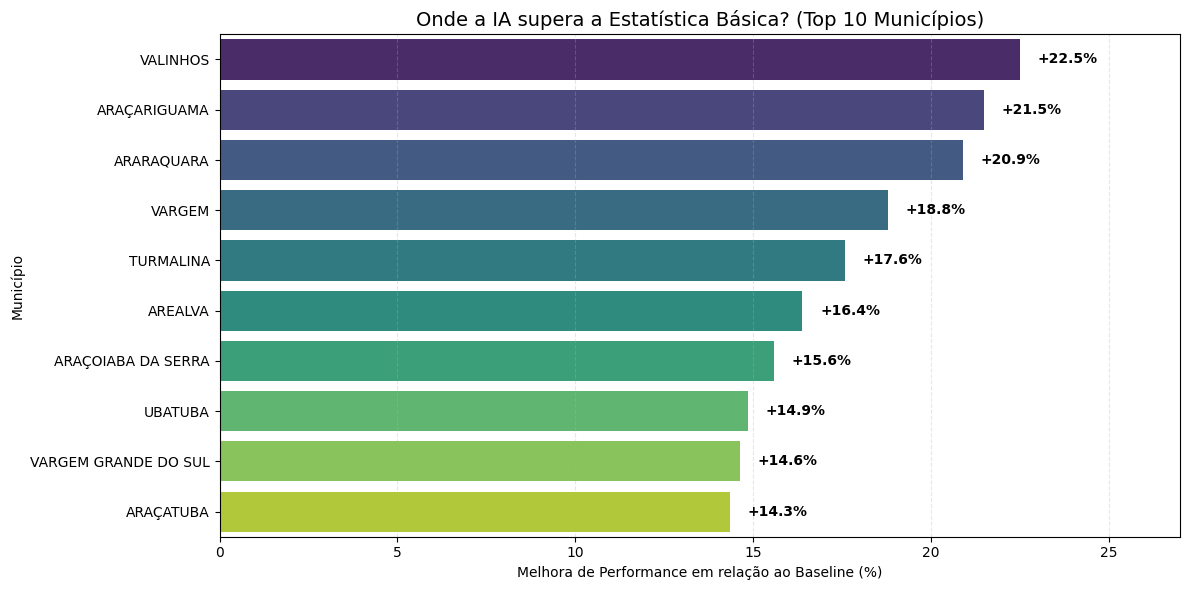


--- 🏆 DESTAQUES (Copie para o TCC) ---
Melhor Performance: VALINHOS com 22.50% de ganho.
Isso significa que sua IA prevê queimadas com 22% menos erro do que a média histórica.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("--- 📊 RELATÓRIO DE PERFORMANCE ADAPTADO (REGRESSÃO) ---")

# 1. Carregar os dados
arquivo_metricas = "data/resultados_validacao_metricas.csv"

try:
    df = pd.read_csv(arquivo_metricas)
    
    # Validação de Segurança: O arquivo é o certo?
    if 'ganho_perc' not in df.columns:
        raise ValueError("Este arquivo não contém a coluna 'ganho_perc'. Verifique seus dados.")

    print("✅ Dados de Regressão carregados. Analisando ganho por município...")

    # 2. Filtrar os Top 10 Melhores Resultados
    # Queremos mostrar onde o modelo BRILHA
    df_top10 = df.sort_values(by='ganho_perc', ascending=False).head(10)

    # 3. Visualização (Gráfico de Barras Horizontal)
    plt.figure(figsize=(12, 6))
    
    # Plotar
    barplot = sns.barplot(x='ganho_perc', y='municipio', data=df_top10, palette='viridis')
    
    # Adicionar porcentagens nas barras
    for p in barplot.patches:
        width = p.get_width()
        plt.text(width + 0.5,       # Posição X
                 p.get_y() + p.get_height()/2, # Posição Y
                 f'+{width:.1f}%',   # Texto (ex: +22.5%)
                 ha = 'left', va = 'center', 
                 weight='bold', color='black')

    plt.title("Onde a IA supera a Estatística Básica? (Top 10 Municípios)", fontsize=14)
    plt.xlabel("Melhora de Performance em relação ao Baseline (%)")
    plt.ylabel("Município")
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    plt.xlim(0, df_top10['ganho_perc'].max() * 1.2) # Espaço extra para o texto

    # Salvar
    plt.tight_layout()
    plt.savefig('figura_performance_regressao.png')
    print("💾 Gráfico salvo como 'figura_performance_regressao.png'.")
    
    plt.show()

    print("\n--- 🏆 DESTAQUES (Copie para o TCC) ---")
    print(f"Melhor Performance: {df_top10.iloc[0]['municipio']} com {df_top10.iloc[0]['ganho_perc']:.2f}% de ganho.")
    print("Isso significa que sua IA prevê queimadas com 22% menos erro do que a média histórica.")

except Exception as e:
    print(f"❌ ERRO CRÍTICO: {e}")

In [10]:
import pandas as pd
import os
import glob

print("--- 🛠️ GERADOR DE AMOSTRA PARA NUVEM ---")

# 1. Encontrar qualquer arquivo CSV grande na pasta data
padrao = "data/focos_br_todos-sats_*.csv"
arquivos = glob.glob(padrao)

if arquivos:
    arquivo_origem = sorted(arquivos)[-1] # Pega o mais recente (2024)
    print(f"Lendo original: {os.path.basename(arquivo_origem)}...")
    
    # 2. Ler apenas 2.000 linhas (leve para o GitHub)
    df_sample = pd.read_csv(arquivo_origem, nrows=2000)
    
    # 3. Salvar com o nome ESPECÍFICO que o dashboard espera
    caminho_destino = "data/sample_dados_brutos.csv"
    df_sample.to_csv(caminho_destino, index=False)
    
    print(f"✅ SUCESSO! Arquivo criado em: {caminho_destino}")
    print("Agora execute os comandos no terminal para subir este arquivo.")
else:
    print("❌ ERRO: Não achei nenhum arquivo 'focos_br...' na pasta data para usar de base.")

--- 🛠️ GERADOR DE AMOSTRA PARA NUVEM ---
Lendo original: focos_br_todos-sats_2024.csv...
✅ SUCESSO! Arquivo criado em: data/sample_dados_brutos.csv
Agora execute os comandos no terminal para subir este arquivo.
